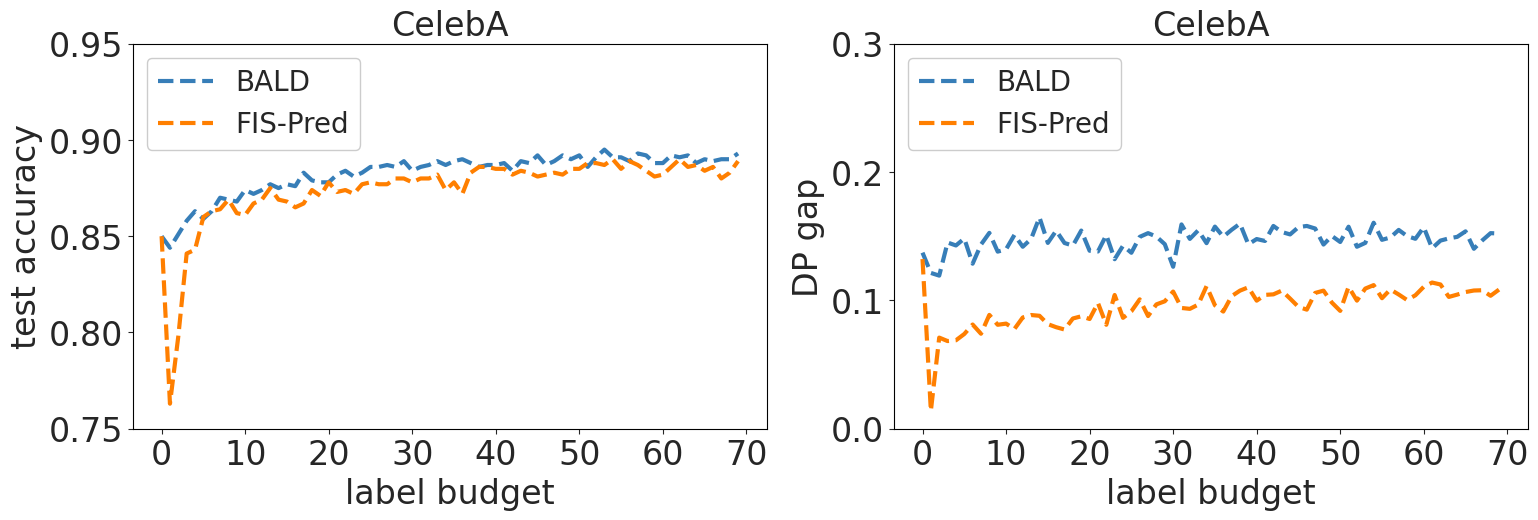

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the Seaborn theme
sns.set_style('ticks')
palette = plt.get_cmap('Set1')


def moving_average(data, window_size):
    """计算移动平均"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')





# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 5))


'''
Dataset option
'''

# 1: adult
# 2: compas
# 3: jigsaw
# 4: celeba

dataset_num = 4


if dataset_num == 1:
    ################ adult dataset ###########################

    dataset = 'adult'
    dataset_tag = 'Adult'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_budget.log'
    file_name_baseline = 'label_s6_dp_4_budget.log'
    gap_lower_bound = 0
    gap_upper_bound = 0.4
    
    acc_lower_bound = 0.2
    acc_upper_bound = 1.00

    step_gap = 25
    # 设置窗口大小
    window_size = 8
    
    ###########################################################
elif dataset_num ==2:

    ################ compas dataset ###########################

    dataset = 'compas'
    dataset_tag = 'Compas'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_budget.log'
    file_name_baseline = 'label_s6_dp_4_budget.log'
    gap_lower_bound = 0.25
    gap_upper_bound = 0.4
    
    acc_lower_bound = 0.65
    acc_upper_bound = 0.75
    step_gap = 50
    window_size = 8
    ###########################################################

elif dataset_num == 3:
    ################ jigsaw dataset ###########################

    dataset = 'jigsaw'
    dataset_tag = 'Jigsaw'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_512.log'
    file_name_baseline = 'label_s6_dp_4_512.log'
    # file_name_strategy5 = 'label_s5_dp_4_1024.log'
    # file_name_baseline = 'label_s6_dp_4_1024.log'
    gap_lower_bound = 0
    gap_upper_bound = 0.15

    acc_lower_bound = 0.65
    acc_upper_bound = 0.8
    step_gap = 25
    window_size = 8
    ###########################################################
elif dataset_num == 4:

    ############### celeba dataset ###########################
    dataset = 'celeba'
    dataset_tag = 'CelebA'
    tol = 0.05
    #tol = 0.01
    avg_cnt = 3
    suffix = ''
    # root = f'./logs/fair_sampling/{dataset}-backup/'
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'Smiling_s5_dp_4_256.log'
    file_name_baseline = 'Smiling_s6_dp_4_256.log'

    # file_name_strategy5 = 'Smiling_s5_dp_4_1024.log'
    # file_name_baseline = 'Smiling_s6_dp_4_1024.log'

    gap_lower_bound = 0
    gap_upper_bound = 0.3
    
    acc_lower_bound = 0.75
    acc_upper_bound = 0.95
    step_gap = 10
    window_size = 1



############################################
baseline = 'BALD'
proposed_method = 'FIS-Pred' 


##########################################################
# Read your log file
with open(root + file_name_strategy5, 'r') as file:
    log_data_strategy5 = file.read()

# Additional log data (for comparison)
# Read your log file
with open(root + file_name_baseline, 'r') as file:
    log_data_baseline = file.read()


# Regular expression pattern to find test accuracy and DP gap
pattern = r'test acc: ([0-9.]+) .+ test dp gap: ([0-9.]+)'

# Extracting data
test_acc = []
dp_gap = []

for match in re.finditer(pattern, log_data_strategy5):
    test_acc.append(float(match.group(1)))
    dp_gap.append(float(match.group(2)))


# Note: This will work if the length of dp_gap is divisible by 4.
# If it's not, you might need to handle the last few values separately.


### Baseline: BALD
additional_test_acc = []
additional_dp_gap = []

for match in re.finditer(pattern, log_data_baseline):
    additional_test_acc.append(float(match.group(1)))
    additional_dp_gap.append(float(match.group(2)))

# # Plotting Test Accuracy
# fig, axs[0] = plt.subplots()



rounds_list = list(range(len(test_acc)))

############################################################################################
'''test accuracy'''

# 对 dp_gap 和 additional_dp_gap 应用移动平均
smoothed_test_acc = moving_average(test_acc, window_size)
smoothed_additional_test_acc = moving_average(additional_test_acc, window_size)

# 更新 rounds_list 以匹配平滑数据的长度
smoothed_rounds_list = list(range(len(smoothed_test_acc)))

axs[0].plot(smoothed_rounds_list, smoothed_additional_test_acc, color=palette(1), label=baseline, linewidth=3, linestyle='--')
axs[0].plot(smoothed_rounds_list, smoothed_test_acc, color=palette(4), label=proposed_method, linewidth=3, linestyle='--')

axs[0].set_title(dataset_tag, fontsize=24)
axs[0].set_xlabel('label budget', fontsize=24)
axs[0].set_ylabel('test accuracy', fontsize=24)
axs[0].set_xticks(np.arange(0, len(smoothed_test_acc) +10,step_gap ))  # Set x-axis ticks
axs[0].legend(loc='upper left', frameon=True, framealpha=1, fontsize = 20)
axs[0].set_ylim(acc_lower_bound, acc_upper_bound)  # Set x-axis ticks

# For Test Accuracy subplot
axs[0].tick_params(axis='both', labelsize=24)
axs[0].spines['bottom'].set_color('black')
axs[0].spines['left'].set_color('black')
axs[0].spines['top'].set_color('black')
axs[0].spines['right'].set_color('black')

############################################################################################
'''fairness disparity'''

# 对 dp_gap 和 additional_dp_gap 应用移动平均
smoothed_dp_gap = moving_average(dp_gap, window_size)
smoothed_additional_dp_gap = moving_average(additional_dp_gap, window_size)

# 更新 rounds_list 以匹配平滑数据的长度
smoothed_rounds_list = list(range(len(smoothed_dp_gap)))







axs[1].plot(smoothed_rounds_list, smoothed_additional_dp_gap, color=palette(1), label=baseline, linewidth=3, linestyle='--')
axs[1].plot(smoothed_rounds_list, smoothed_dp_gap, color=palette(4), label=proposed_method, linewidth=3, linestyle='--')

axs[1].tick_params(axis='both', labelsize=24)
axs[1].spines['bottom'].set_color('black')
axs[1].spines['left'].set_color('black')
axs[1].spines['top'].set_color('black')
axs[1].spines['right'].set_color('black')

axs[1].set_ylim(gap_lower_bound, gap_upper_bound)  # Set x-axis ticks
axs[1].set_title(dataset_tag, fontsize=24)
axs[1].set_xlabel('label budget', fontsize=24)
axs[1].set_ylabel('DP gap', fontsize=24)
axs[1].set_xticks(np.arange(0, len(smoothed_dp_gap) +10, step_gap))  # Set x-axis ticks
axs[1].legend(loc='upper left', frameon=True, framealpha=1, fontsize = 20)




plt.subplots_adjust(wspace=0.2)  # Adjust this value to increase space between plots

plt.show()

fig_path = 'figures/'
big_fig_name = dataset + '_impact_label_budget.pdf'
fig.savefig(fig_path + big_fig_name, dpi=300, bbox_inches='tight')


Accuracy List: [0.733, 0.721, 0.718, 0.719, 0.716, 0.717, 0.719, 0.719, 0.722, 0.722, 0.722, 0.73, 0.73, 0.723, 0.728, 0.722, 0.713, 0.713]
Fairness List: [0.033, 0.033, 0.044, 0.049, 0.044, 0.048, 0.037, 0.037, 0.028, 0.028, 0.03, 0.03, 0.03, 0.039, 0.046, 0.047, 0.051, 0.051]
Accuracy List: [0.714, 0.716, 0.721, 0.72, 0.718, 0.718, 0.718, 0.72, 0.719, 0.719, 0.719, 0.719, 0.722, 0.722, 0.722, 0.721, 0.723, 0.72]
Fairness List: [0.056, 0.056, 0.053, 0.049, 0.045, 0.045, 0.045, 0.042, 0.046, 0.046, 0.046, 0.046, 0.048, 0.048, 0.046, 0.05, 0.054, 0.051]


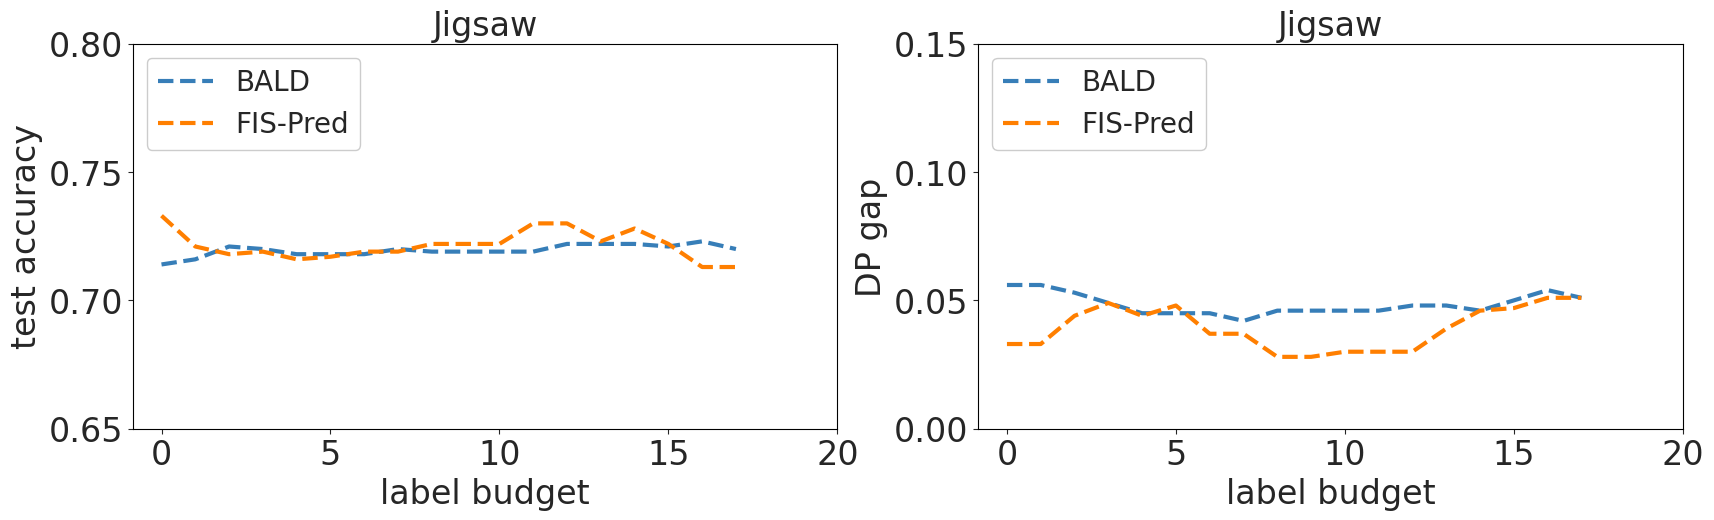

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the Seaborn theme
sns.set_style('ticks')
palette = plt.get_cmap('Set1')


def moving_average(data, window_size):
    """计算移动平均"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')





# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))


'''
Dataset option
'''

# 1: adult
# 2: compas
# 3: jigsaw
# 4: celeba

dataset_num = 3


if dataset_num == 1:
    ################ adult dataset ###########################

    dataset = 'adult'
    dataset_tag = 'Adult'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_budget' + '.txt'
    file_name_baseline = 'label_s6_dp_4_budget' + '.txt'
    gap_lower_bound = 0
    gap_upper_bound = 0.1
    
    acc_lower_bound = 0.3
    acc_upper_bound = 0.8

    step_gap = 25
    # 设置窗口大小
    window_size = 8
    
    ###########################################################
elif dataset_num ==2:

    ################ compas dataset ###########################

    dataset = 'compas'
    dataset_tag = 'Compas'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_budget' + '.txt'
    file_name_baseline = 'label_s6_dp_4_budget' + '.txt'
    gap_lower_bound = 0.25
    gap_upper_bound = 0.4
    
    acc_lower_bound = 0.65
    acc_upper_bound = 0.75
    step_gap = 25
    window_size = 8
    ###########################################################

elif dataset_num == 3:
    ################ jigsaw dataset ###########################

    dataset = 'jigsaw'
    dataset_tag = 'Jigsaw'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    label_budget = '512'
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_' + label_budget + '.txt'
    file_name_baseline = 'label_s6_dp_4_' + label_budget +'.txt'
    # file_name_strategy5 = 'label_s5_dp_4_1024' + '.txt'
    # file_name_baseline = 'label_s6_dp_4_1024' + '.txt'
    gap_lower_bound = 0
    gap_upper_bound = 0.15

    acc_lower_bound = 0.65
    acc_upper_bound = 0.8
    step_gap = 5
    window_size = 8
    ###########################################################
elif dataset_num == 4:

    ############### celeba dataset ###########################
    dataset = 'celeba'
    dataset_tag = 'CelebA'
    tol = 0.05
    #tol = 0.01
    avg_cnt = 3
    suffix = ''
    # root = f'./logs/fair_sampling/{dataset}-backup/'
    root = f'./logs/fair_sampling/{dataset}/'
    # file_name_strategy5 = 'Smiling_s5_dp_4_256' + '.txt'
    # file_name_baseline = 'Smiling_s6_dp_4_256' + '.txt'

    file_name_strategy5 = 'Smiling_s5_dp_4_1024.txt'
    file_name_baseline = 'Smiling_s6_dp_4_1024.txt'

    gap_lower_bound = 0
    gap_upper_bound = 0.3
    
    acc_lower_bound = 0.75
    acc_upper_bound = 0.95
    step_gap = 10
    window_size = 1



############################################
baseline = 'BALD'
proposed_method = 'FIS-Pred' 


##########################################################
# Read your log file
# with open(root + file_name_strategy5, 'r') as file:
#     log_data_strategy5 = file.read()

# # Additional log data (for comparison)
# # Read your log file
# with open(root + file_name_baseline, 'r') as file:
#     log_data_baseline = file.read()


# # Regular expression pattern to find test accuracy and DP gap
# pattern = r'test acc: ([0-9.]+) .+ test dp gap: ([0-9.]+)'

# # Extracting data
# test_acc = []
# dp_gap = []

# for match in re.finditer(pattern, log_data_strategy5):
#     test_acc.append(float(match.group(1)))
#     dp_gap.append(float(match.group(2)))
### Baseline: BALD
# additional_test_acc = []
# additional_dp_gap = []

# for match in re.finditer(pattern, log_data_baseline):
#     additional_test_acc.append(float(match.group(1)))
#     additional_dp_gap.append(float(match.group(2)))

#######################################################################
# 初始化两个列表

window_size = 1
test_acc = []
dp_gap = []

# 打开文件并读取每一行
with open(root + file_name_strategy5, 'r') as file:
    for line in file:
        # 将每行转换为元组
        values = line.strip().split(',')
        # 分别添加到对应的列表
        test_acc.append(float(values[0].strip('(')))
        dp_gap.append(float(values[1].strip(')')))

# 输出结果，以验证
print("Accuracy List:", test_acc)
print("Fairness List:", dp_gap)



additional_test_acc = []
additional_dp_gap = []

# 打开文件并读取每一行
with open(root + file_name_baseline, 'r') as file:
    for line in file:
        # 将每行转换为元组
        values = line.strip().split(',')
        # 分别添加到对应的列表
        additional_test_acc.append(float(values[0].strip('(')))
        additional_dp_gap.append(float(values[1].strip(')')))

# 输出结果，以验证
print("Accuracy List:", additional_test_acc)
print("Fairness List:", additional_dp_gap)
#######################################################################



# Note: This will work if the length of dp_gap is divisible by 4.
# If it's not, you might need to handle the last few values separately.



# # Plotting Test Accuracy
# fig, axs[0] = plt.subplots()



rounds_list = list(range(len(test_acc)))

############################################################################################
'''test accuracy'''

# 对 dp_gap 和 additional_dp_gap 应用移动平均
smoothed_test_acc = moving_average(test_acc, window_size)
smoothed_additional_test_acc = moving_average(additional_test_acc, window_size)

# 更新 rounds_list 以匹配平滑数据的长度
smoothed_rounds_list = list(range(len(smoothed_test_acc)))

axs[0].plot(smoothed_rounds_list, smoothed_additional_test_acc, color=palette(1), label=baseline, linewidth=3, linestyle='--')
axs[0].plot(smoothed_rounds_list, smoothed_test_acc, color=palette(4), label=proposed_method, linewidth=3, linestyle='--')

axs[0].set_title(dataset_tag, fontsize=24)
axs[0].set_xlabel('label budget', fontsize=24)
axs[0].set_ylabel('test accuracy', fontsize=24)
axs[0].set_xticks(np.arange(0, len(smoothed_test_acc) +5,step_gap ))  # Set x-axis ticks
axs[0].legend(loc='upper left', frameon=True, framealpha=1, fontsize = 20)
axs[0].set_ylim(acc_lower_bound, acc_upper_bound)  # Set x-axis ticks

# For Test Accuracy subplot
axs[0].tick_params(axis='both', labelsize=24)
axs[0].spines['bottom'].set_color('black')
axs[0].spines['left'].set_color('black')
axs[0].spines['top'].set_color('black')
axs[0].spines['right'].set_color('black')

############################################################################################
'''fairness disparity'''

# 对 dp_gap 和 additional_dp_gap 应用移动平均
smoothed_dp_gap = moving_average(dp_gap, window_size)
smoothed_additional_dp_gap = moving_average(additional_dp_gap, window_size)

# 更新 rounds_list 以匹配平滑数据的长度
smoothed_rounds_list = list(range(len(smoothed_dp_gap)))







axs[1].plot(smoothed_rounds_list, smoothed_additional_dp_gap, color=palette(1), label=baseline, linewidth=3, linestyle='--')
axs[1].plot(smoothed_rounds_list, smoothed_dp_gap, color=palette(4), label=proposed_method, linewidth=3, linestyle='--')

axs[1].tick_params(axis='both', labelsize=24)
axs[1].spines['bottom'].set_color('black')
axs[1].spines['left'].set_color('black')
axs[1].spines['top'].set_color('black')
axs[1].spines['right'].set_color('black')

axs[1].set_ylim(gap_lower_bound, gap_upper_bound)  # Set x-axis ticks
axs[1].set_title(dataset_tag, fontsize=24)
axs[1].set_xlabel('label budget', fontsize=24)
axs[1].set_ylabel('DP gap', fontsize=24)
axs[1].set_xticks(np.arange(0, len(smoothed_dp_gap) +5, step_gap))  # Set x-axis ticks
axs[1].legend(loc='upper left', frameon=True, framealpha=1, fontsize = 20)




plt.subplots_adjust(wspace=0.2)  # Adjust this value to increase space between plots

plt.show()

fig_path = 'figures/'
big_fig_name = dataset + '_impact_label_budget.pdf'
fig.savefig(fig_path + big_fig_name, dpi=300, bbox_inches='tight')
